In [108]:
import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Basic of PyTorch

### Matrices

In [109]:
array = [[1, 2, 3],
         [4, 5, 6]]
first_array = np.array(array)

print(f'Array type: {type(first_array)}')
print(f'Array shape: {first_array.shape}')
print(first_array)

Array type: <class 'numpy.ndarray'>
Array shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [110]:
first_tensor = torch.tensor(array)

print(f'Tensor type: {type(first_tensor)}')
print(f'Tensor shape: {first_tensor.shape}')
print(first_tensor)

Tensor type: <class 'torch.Tensor'>
Tensor shape: torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [111]:
print(np.ones((2, 3)))
print(torch.ones(2, 3))

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [112]:
np.ones((2, 3)).dtype

dtype('float64')

In [113]:
torch.ones(2, 3).dtype

torch.float32

In [114]:
print(np.random.rand(2, 3))
print(torch.rand(2, 3))

[[0.23107148 0.71739755 0.61780484]
 [0.04961552 0.76210247 0.93662753]]
tensor([[0.3655, 0.4380, 0.3889],
        [0.8129, 0.5464, 0.3771]])


In [115]:
print(np.random.randn(2, 3))
print(torch.randn(2, 3))

[[ 0.20792161  0.44711404  2.01204076]
 [-0.20855564  1.08842815 -0.0351604 ]]
tensor([[ 0.9300, -1.4642,  1.3972],
        [-1.2269, -0.1053,  1.9395]])


In [116]:
array = np.random.rand(2, 2)
print(array, type(array))

from_numpy_to_tensor = torch.from_numpy(array)
print(from_numpy_to_tensor, type(from_numpy_to_tensor))

[[0.3765057  0.22979593]
 [0.04654948 0.80594969]] <class 'numpy.ndarray'>
tensor([[0.3765, 0.2298],
        [0.0465, 0.8059]], dtype=torch.float64) <class 'torch.Tensor'>


In [117]:
tensor = from_numpy_to_tensor
print(tensor, type(tensor))

from_tensor_to_numpy = tensor.numpy()
print(from_tensor_to_numpy, type(from_tensor_to_numpy))

tensor([[0.3765, 0.2298],
        [0.0465, 0.8059]], dtype=torch.float64) <class 'torch.Tensor'>
[[0.3765057  0.22979593]
 [0.04654948 0.80594969]] <class 'numpy.ndarray'>


### Basic Math with PyTorch

In [118]:
tensor = torch.ones(3, 3)

print(tensor, tensor.shape, end='\n')
print(tensor.view(9), tensor.view(9).shape, end='\n')
print(torch.add(tensor, tensor), end='\n')
print(torch.sub(tensor, tensor, alpha=3), end='\n')
print(torch.mul(tensor, tensor)) # Element-wise multiplication
print(torch.div(tensor, tensor)) # Element-wise substraction

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) torch.Size([3, 3])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.]) torch.Size([9])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([[-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [119]:
tensor = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)

print(f'Mean = {tensor.mean()}')
print(f'Standard deviation = {tensor.std()}')

Mean = 3.0
Standard deviation = 1.5811388492584229


In [120]:
tensor.requires_grad

False

## Variables
* Accumulate gradients

In [121]:
from torch.autograd import Variable

var = Variable(torch.ones(3, 3), requires_grad=True)
var

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)

In [122]:
array = [2, 4]
tensor = torch.tensor(array, dtype=torch.float)
x = Variable(tensor, requires_grad=True)
y = x ** 2
o = 0.5 * sum(y)
o.backward()
print(f'y = {y}')
print(f'o = {o}')
print(f'x.grad = {x.grad}')

y = tensor([ 4., 16.], grad_fn=<PowBackward0>)
o = 10.0
x.grad = tensor([2., 4.])


In [123]:
sum(y)

tensor(20., grad_fn=<AddBackward0>)

In [124]:
x

tensor([2., 4.], requires_grad=True)

In [125]:
y.requires_grad

True

## Linear Regression

In [126]:
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

In [127]:
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

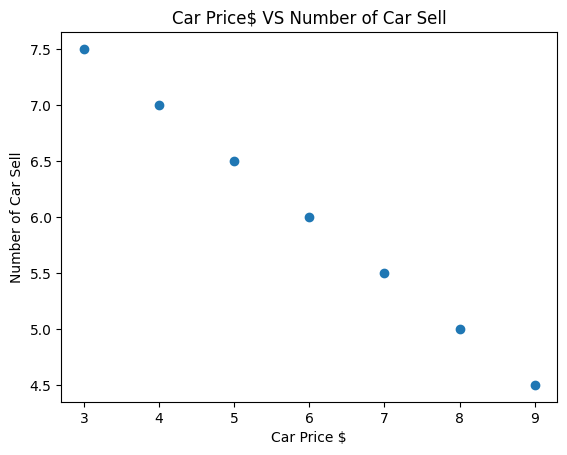

In [128]:
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

In [129]:
import torch
from torch import nn
from torch.autograd import Variable

import warnings
warnings.filterwarnings('ignore')

In [130]:
class LinearRegressionModel(nn.Module):

  def __init__(self, input_size, output_size):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(in_features=input_size,
                            out_features=output_size)

  def forward(self, x):
    return self.linear(x)

In [131]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_size=input_dim,
                              output_size=output_dim)

In [132]:
loss_fn = nn.MSELoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

In [133]:
loss_values = []
iterations = 2000

for iteration in range(iterations):

  preds = model(car_price_tensor)
  loss = loss_fn(preds, number_of_car_sell_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  loss_values.append(loss.item())

  if iteration % 50 == 0:
    print(f'ITERATION: {iteration} | LOSS: {loss.item()}')

ITERATION: 0 | LOSS: 40.07944869995117
ITERATION: 50 | LOSS: 6.8560566902160645
ITERATION: 100 | LOSS: 5.637003421783447
ITERATION: 150 | LOSS: 4.63470458984375
ITERATION: 200 | LOSS: 3.8106212615966797
ITERATION: 250 | LOSS: 3.1330676078796387
ITERATION: 300 | LOSS: 2.575986623764038
ITERATION: 350 | LOSS: 2.1179592609405518
ITERATION: 400 | LOSS: 1.7413712739944458
ITERATION: 450 | LOSS: 1.4317432641983032
ITERATION: 500 | LOSS: 1.177169919013977
ITERATION: 550 | LOSS: 0.9678611159324646
ITERATION: 600 | LOSS: 0.7957682609558105
ITERATION: 650 | LOSS: 0.6542754769325256
ITERATION: 700 | LOSS: 0.5379409193992615
ITERATION: 750 | LOSS: 0.4422910809516907
ITERATION: 800 | LOSS: 0.3636493384838104
ITERATION: 850 | LOSS: 0.29899024963378906
ITERATION: 900 | LOSS: 0.24582742154598236
ITERATION: 950 | LOSS: 0.20211736857891083
ITERATION: 1000 | LOSS: 0.166179820895195
ITERATION: 1050 | LOSS: 0.13663198053836823
ITERATION: 1100 | LOSS: 0.11233814805746078
ITERATION: 1150 | LOSS: 0.0923632532

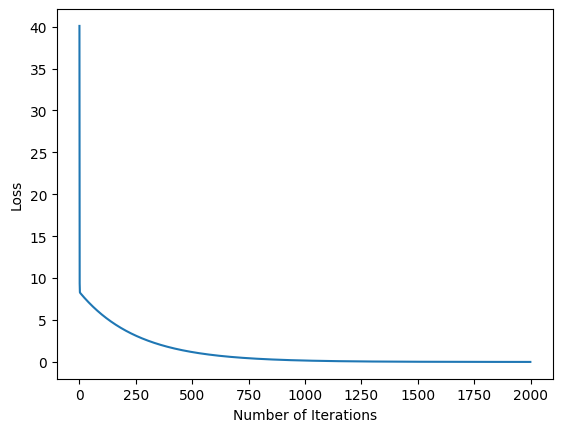

In [134]:
plt.plot(range(iterations), loss_values)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

In [135]:
preds = model(car_price_tensor).detach().numpy()

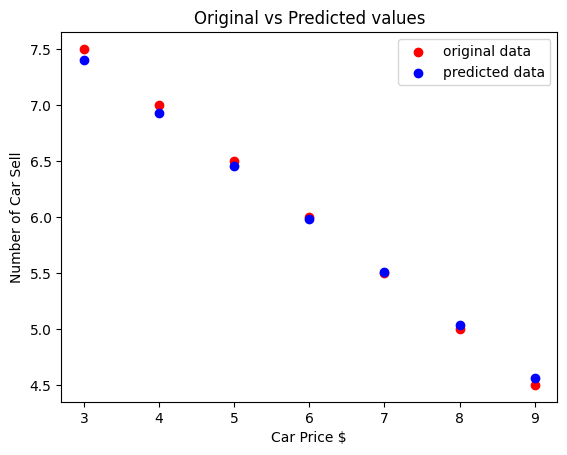

In [136]:
plt.scatter(car_prices_array, number_of_car_sell_array, label = "original data", color ="red")
plt.scatter(car_prices_array, preds, label = "predicted data", color ="blue")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()